# Filtering, String Methods, Grouping and Visualizing Data

Son Huynh
31.01.2020

Deadline: **11:59pm 28.02** (Friday)

Submit link: https://www.dropbox.com/request/ZvBWoQUCy8pwRVxQxwJx

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('cars.csv')

# remove dollar sign and convert text to number
cars.MSRP = cars.MSRP.str.replace('$', '')
cars.MSRP = cars.MSRP.astype(int)

cars.columns = cars.columns.str.replace(' ', '') # remove white space in column name

cars.head(3)

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,MDX,Asia,All,36945,3.5,6.0,265,17,23,4451.0,106.0,189.0
1,Acura,Sedan,RSX Type S 2dr,Asia,Front,23820,2.0,4.0,200,24,31,2778.0,101.0,172.0
2,Acura,Sedan,TSX 4dr,Asia,Front,26990,2.4,4.0,200,22,29,3230.0,105.0,183.0


### Filtering

In [3]:
# Select cars with Weight bigger than 6000 OR smaller than 2000
# cars[(cars.Weight< 2000) | (cars.Weight > 6000)]

#XORing to filter out true values
cars[cars.Weight.between(2000,6000) ^ cars.Weight]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
118,Ford,SUV,Excursion 6.8 XLT,USA,All,41475,6.8,10.0,310,10,13,7190.0,137.0,227.0
143,GMC,SUV,Yukon XL 2500 SLT,USA,All,46265,6.0,8.0,325,13,17,6133.0,130.0,219.0
150,Honda,Hybrid,Insight 2dr (gas/electric),Asia,Front,19110,2.0,3.0,73,60,66,1850.0,95.0,155.0
166,Hummer,SUV,H2,USA,All,49995,6.0,8.0,316,10,12,6400.0,123.0,190.0


In [4]:
# Select cars that have 8 to 12 cylinders
cars[cars.Cylinders.between(8,12)]

# cars[(cars.Cylinders > 8) & (cars.Cylinders < 12)]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
17,Audi,Sedan,A6 4.2 Quattro 4dr,Europe,All,49690,4.2,8.0,300,17,24,4024.0,109.0,193.0
18,Audi,Sedan,A8 L Quattro 4dr,Europe,All,69190,4.2,8.0,330,17,24,4399.0,121.0,204.0
19,Audi,Sedan,S4 Quattro 4dr,Europe,All,48040,4.2,8.0,340,14,20,3825.0,NaN,179.0
20,Audi,Sports,RS 6 4dr,Europe,Front,84600,4.2,8.0,450,15,22,4024.0,109.0,191.0
25,Audi,Wagon,S4 Avant Quattro,Europe,All,49090,4.2,8.0,340,15,21,3936.0,104.0,179.0
27,BMW,SUV,X5 4.4i,Europe,All,52195,4.4,8.0,325,16,22,4824.0,NaN,184.0
38,BMW,Sedan,545iA 4dr,Europe,Rear,54995,4.4,8.0,325,18,26,3814.0,114.0,191.0
39,BMW,Sedan,745i 4dr,Europe,Rear,69195,4.4,8.0,325,18,26,4376.0,118.0,198.0
40,BMW,Sedan,745Li 4dr,Europe,Rear,73195,4.4,8.0,325,18,26,4464.0,123.0,204.0
55,Cadillac,SUV,Escalade,USA,Front,52795,5.3,8.0,295,14,18,5367.0,116.0,199.0


In [5]:
# Select Mazda and Honda cars with Length longer than 180 inches

# cars[((cars.Make == 'Mazda') | (cars.Make == 'Honda')) & (cars.Length > 180)]
cars[(cars.Make.isin(['Mazda', 'Honda'])) & (cars.Length > 180)]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
151,Honda,SUV,Pilot LX,Asia,All,27560,3.5,6.0,240,17,22,4387.0,106.0,188.0
157,Honda,Sedan,Accord LX 2dr,Asia,Front,19860,2.4,4.0,160,26,34,2994.0,105.0,188.0
158,Honda,Sedan,Accord EX 2dr,Asia,Front,22260,2.4,4.0,160,26,34,3047.0,105.0,188.0
161,Honda,Sedan,Accord LX V6 4dr,Asia,Front,23760,3.0,6.0,240,21,30,3349.0,108.0,190.0
162,Honda,Sedan,Accord EX V6 2dr,Asia,Front,26960,3.0,6.0,240,21,30,3294.0,105.0,188.0
163,Honda,Sedan,Odyssey LX,Asia,Front,24950,3.5,6.0,240,18,25,4310.0,118.0,201.0
164,Honda,Sedan,Odyssey EX,Asia,Front,27450,3.5,6.0,240,18,25,4365.0,118.0,201.0
243,Mazda,Sedan,Mazda6 i 4dr,Asia,Front,19270,2.3,4.0,160,24,32,3042.0,105.0,187.0
244,Mazda,Sedan,MPV ES,Asia,Front,28750,3.0,6.0,200,18,25,3812.0,112.0,188.0
249,Mazda,Truck,B2300 SX Regular Cab,Asia,Rear,14840,2.3,4.0,143,24,29,2960.0,112.0,188.0


In [6]:
# Select all except cars of sedan type
cars[cars.Type != 'Sedan']

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,MDX,Asia,All,36945,3.5,6.0,265,17,23,4451.0,106.0,189.0
6,Acura,Sports,NSX coupe 2dr manual S,Asia,Rear,89765,3.2,6.0,290,17,24,3153.0,100.0,174.0
20,Audi,Sports,RS 6 4dr,Europe,Front,84600,4.2,8.0,450,15,22,4024.0,109.0,191.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
23,Audi,Sports,TT 3.2 coupe 2dr (convertible),Europe,All,40590,3.2,6.0,250,21,29,3351.0,96.0,159.0
24,Audi,Wagon,A6 3.0 Avant Quattro,Europe,All,40840,3.0,6.0,220,18,25,4035.0,NaN,192.0
25,Audi,Wagon,S4 Avant Quattro,Europe,All,49090,4.2,8.0,340,15,21,3936.0,104.0,179.0
26,BMW,SUV,X3 3.0i,Europe,All,37000,3.0,6.0,225,16,23,4023.0,110.0,180.0
27,BMW,SUV,X5 4.4i,Europe,All,52195,4.4,8.0,325,16,22,4824.0,NaN,184.0


In [7]:
# Select only Lexus cars, then calculate the percentage of SUVs among Lexus cars (try using loc)
lexus  = cars[(cars.Make == 'Lexus')]
SUVs_percent = round(len(lexus.loc[cars.Type == 'SUV'])/len(lexus)*100,2)

print(f'Percentage of SUVs: {SUVs_percent}%')

Percentage of SUVs: 27.27%


### String Methods

In [8]:
# Select cars containing 'convertible' in the model name
cars[cars.Model.str.contains('convertible')]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
8,Audi,Sedan,A41.8T convertible 2dr,Europe,Front,35940,1.8,4.0,170,23,30,3638.0,105.0,180.0
14,Audi,Sedan,A4 3.0 convertible 2dr,Europe,Front,42490,3.0,6.0,220,20,27,3814.0,105.0,180.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
23,Audi,Sports,TT 3.2 coupe 2dr (convertible),Europe,All,40590,3.2,6.0,250,21,29,3351.0,96.0,159.0
30,BMW,Sedan,325Ci convertible 2dr,Europe,Rear,37995,2.5,6.0,184,19,27,3560.0,107.0,177.0
36,BMW,Sedan,330Ci convertible 2dr,Europe,Rear,44295,3.0,6.0,225,19,28,3616.0,107.0,177.0
42,BMW,Sports,M3 convertible 2dr,Europe,Rear,56595,3.2,6.0,333,16,23,3781.0,108.0,177.0
43,BMW,Sports,Z4 convertible 2.5i 2dr,Europe,Rear,33895,2.5,6.0,184,20,28,2932.0,NaN,161.0


In [9]:
# Select cars where the model name ends with 2dr
cars[cars.Model.str.endswith('2dr')]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,Sedan,RSX Type S 2dr,Asia,Front,23820,2.0,4.0,200,24,31,2778.0,101.0,172.0
8,Audi,Sedan,A41.8T convertible 2dr,Europe,Front,35940,1.8,4.0,170,23,30,3638.0,105.0,180.0
14,Audi,Sedan,A4 3.0 convertible 2dr,Europe,Front,42490,3.0,6.0,220,20,27,3814.0,105.0,180.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
29,BMW,Sedan,325Ci 2dr,Europe,Rear,30795,2.5,6.0,184,20,29,3197.0,107.0,177.0
30,BMW,Sedan,325Ci convertible 2dr,Europe,Rear,37995,2.5,6.0,184,19,27,3560.0,107.0,177.0
33,BMW,Sedan,330Ci 2dr,Europe,Rear,36995,3.0,6.0,225,20,30,3285.0,107.0,176.0
36,BMW,Sedan,330Ci convertible 2dr,Europe,Rear,44295,3.0,6.0,225,19,28,3616.0,107.0,177.0
41,BMW,Sports,M3 coupe 2dr,Europe,Rear,48195,3.2,6.0,333,16,24,3415.0,108.0,177.0
42,BMW,Sports,M3 convertible 2dr,Europe,Rear,56595,3.2,6.0,333,16,23,3781.0,108.0,177.0


In [10]:
# Select cars where the model name has more than 4 words. Hint: words are separated by space.
cars[cars.Model.str.count(' ') > 3]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
6,Acura,Sports,NSX coupe 2dr manual S,Asia,Rear,89765,3.2,6.0,290,17,24,3153.0,100.0,174.0
10,Audi,Sedan,A4 3.0 Quattro 4dr manual,Europe,All,33430,3.0,6.0,220,17,26,3583.0,104.0,179.0
11,Audi,Sedan,A4 3.0 Quattro 4dr auto,Europe,All,34480,3.0,6.0,220,18,25,3627.0,104.0,179.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
16,Audi,Sedan,A6 2.7 Turbo Quattro 4dr,Europe,All,42840,2.7,6.0,250,18,25,3836.0,109.0,192.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
23,Audi,Sports,TT 3.2 coupe 2dr (convertible),Europe,All,40590,3.2,6.0,250,21,29,3351.0,96.0,159.0
117,Dodge,Truck,Ram 1500 Regular Cab ST,USA,Rear,20215,3.7,6.0,215,16,21,4542.0,121.0,208.0
131,Ford,Sedan,Crown Victoria LX Sport 4dr,USA,Rear,30315,4.6,8.0,239,17,25,4057.0,115.0,212.0


In [11]:
# Change the strings in the Model column to uppercase. Modify the Model column directly.
cars.Model = cars.Model.str.upper()

cars

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,MDX,Asia,All,36945,3.5,6.0,265,17,23,4451.0,106.0,189.0
1,Acura,Sedan,RSX TYPE S 2DR,Asia,Front,23820,2.0,4.0,200,24,31,2778.0,101.0,172.0
2,Acura,Sedan,TSX 4DR,Asia,Front,26990,2.4,4.0,200,22,29,3230.0,105.0,183.0
3,Acura,Sedan,TL 4DR,Asia,Front,33195,3.2,6.0,270,20,28,3575.0,108.0,186.0
4,Acura,Sedan,3.5 RL 4DR,Asia,Front,43755,3.5,6.0,225,18,24,3880.0,115.0,197.0
5,Acura,Sedan,3.5 RL W/NAVIGATION 4DR,Asia,Front,46100,3.5,6.0,225,18,24,3893.0,115.0,197.0
6,Acura,Sports,NSX COUPE 2DR MANUAL S,Asia,Rear,89765,3.2,6.0,290,17,24,3153.0,100.0,174.0
7,Audi,Sedan,A4 1.8T 4DR,Europe,Front,25940,1.8,4.0,170,22,31,3252.0,104.0,179.0
8,Audi,Sedan,A41.8T CONVERTIBLE 2DR,Europe,Front,35940,1.8,4.0,170,23,30,3638.0,105.0,180.0
9,Audi,Sedan,A4 3.0 4DR,Europe,Front,31840,3.0,6.0,220,20,28,3462.0,104.0,179.0


### Groupby

In [12]:
# Group the data by Origin and calculate the mean for all columns
gb = cars.groupby('Origin')
gb.groups

{'Asia': Int64Index([  0,   1,   2,   3,   4,   5,   6, 149, 150, 151,
             ...
             391, 392, 393, 394, 395, 396, 397, 398, 399, 400],
            dtype='int64', length=158),
 'Europe': Int64Index([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
             ...
             418, 419, 420, 421, 422, 423, 424, 425, 426, 427],
            dtype='int64', length=123),
 'USA': Int64Index([ 46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
             ...
             328, 329, 344, 345, 346, 347, 348, 349, 350, 351],
            dtype='int64', length=147)}

In [13]:
# Group the data by Make and then by Type. What's the cheapest price for a Volvo's SUV?
gb2 = cars.groupby(['Make', 'Type'])

gb2.MSRP.min().loc[('Volvo', 'SUV')]

41250

In [14]:
# Are Audi cars heavier than the rest of car brands on average?
gb3 = cars.groupby(cars.Make == 'Audi')

gb3.mean()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Make,,,,,,,,,
False,32285.545232,3.203178,5.793612,214.264059,20.134474,26.892421,3586.809524,108.344473,186.681704
True,43307.894737,3.057895,6.105263,250.789474,18.473684,25.789474,3700.631579,105.176471,181.421053


In [15]:
# 
print('Yes. The mean for an Audi car weight is ~3701 whereas the other vehicles is ~3587')

Yes. The mean for an Audi car weight is ~3701 whereas the other vehicles is ~3587


### (Optional) Visualization

European cars MSRP distribution is less skewed presenting a higher range of price levels compared to their Asian or North American counterparts.
Asian and North american vehicles price ranges are concentrated on the lower end of the MSRP spectrum.


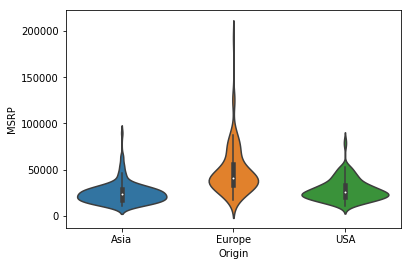

In [16]:
# Use seaborn's violinplot() to plot MSRP by Origin. What can you comment about it?

import seaborn as sns
sns.violinplot(x='Origin', y='MSRP', data=cars)

print('European cars MSRP distribution is less skewed presenting a higher range of price levels compared to their Asian or North American counterparts.\nAsian and North american vehicles price ranges are concentrated on the lower end of the MSRP spectrum.')

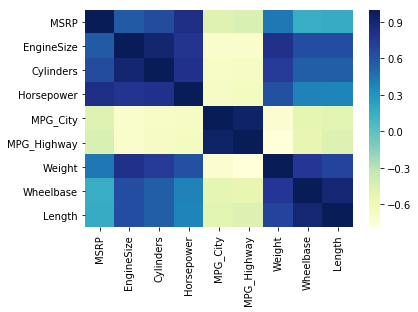

In [138]:
# Use seaborn's heatmap to plot the correlation matrix of cars
color = 'YlGnBu'#sns.palplot(sns.color_palette("BrBG", 1))
#"YlGnBu"
sns.heatmap(cars.corr(), cmap=color, annot=False)

The MPG_City follows a linear pattern decreasing as the weight increases


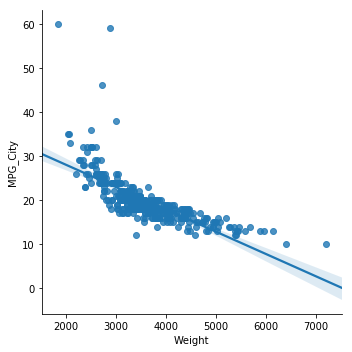

In [139]:
# Use seaborn's lmplot to plot a regression line for Weight and MPG_City. 
# Can you spot a linear relationship?
sns.lmplot(x='Weight', y='MPG_City', data=cars)

print('The MPG_City follows a linear pattern decreasing as the weight increases')


Read more about linear regression:
https://towardsdatascience.com/linear-regression-understanding-the-theory-7e53ac2831b5

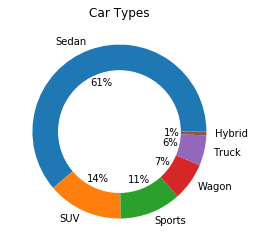

In [126]:
# Recreate this donut chart.
# You can use plot(kind='pie') to create the chart as an ax. Then use plt.Circle() to create a white circle.
# Finally you can use add_artist() to add the circle to the ax.

ax = cars.Type.value_counts().plot(kind = 'pie', title='Car Types', autopct='%1.f%%', label="")
circle = plt.Circle((0,0), 0.7, color = 'w')
ax.add_artist(circle)

![title](pie.png)

Using pie chart is often discouraged. Try making a donut chart, bar chart or treemap instead: https://www.data-to-viz.com/caveat/pie.html

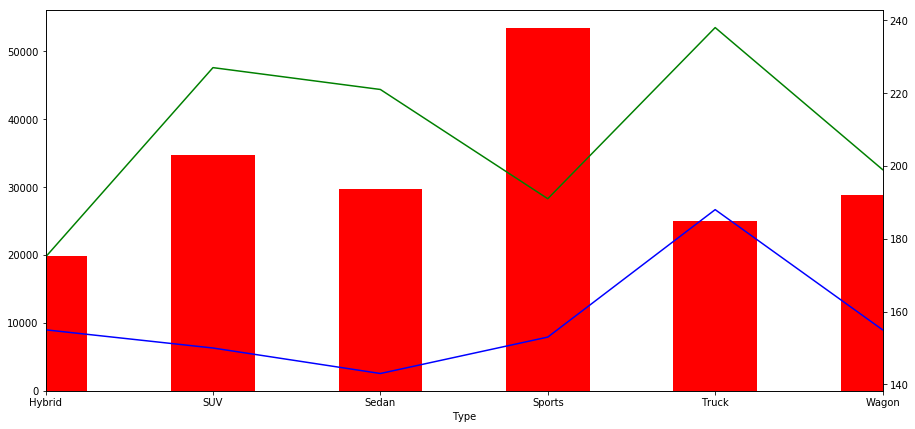

In [124]:
# Group the data by Type and calculate MSRP's mean and Length's max and min.
# Plot a bar chart for MSRP and 2 line charts for max and min lengths.
# All charts should be on the same ax.

gb = cars.groupby('Type')
data = gb.agg({'MSRP': 'mean', 'Length': ['max', 'min']})

# fig, ax = plt.subplots(figsize=(12,6))
p = data['MSRP']['mean'].plot(kind='bar', color='r', figsize = (15,7))
q_1 = data['Length']['min'].plot(kind='line', color = 'b', secondary_y = True, figsize = (15,7))
q_2 = data['Length']['max'].plot(kind='line', color = 'g', secondary_y = True, figsize = (15,7))